In [ ]:
# Unsupervised clustering of customer data

In [2]:
# Importing the libraries

import numpy as np 
import pandas as pd 
import datetime 
import matplotlib.pyplot as plt 
from matplotlib import colors
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA 
from yellowbrick.cluster import KElbowVisualizer 
from sklearn.cluster import KMeans
import matplotlib
from mpl_toolkits.mplot3d import Axes3D 
from sklearn.cluster import AgglomerativeClustering 
from matplotlib.colors import ListedColormap 
from sklearn import metrics
import warnings 
import sys 
if not sys.warnoptions:
    warnings.simplefilter("ignore")
    np.random.seed(42)





In [4]:
# Loading the dataset
data=pd.read_csv('customer_data.csv')

print("Number of datapoints:", len(data))
data.head()

Number of datapoints: 100000


,id,age,gender,income,education,region,loyalty_status,purchase_frequency,purchase_amount,product_category,promotion_usage,satisfaction_score
0,1,27,Male,40682,Bachelor,East,Gold,frequent,18249,Books,0,6
1,2,29,Male,15317,Masters,West,Regular,rare,4557,Clothing,1,6
2,3,37,Male,38849,Bachelor,West,Silver,rare,11822,Clothing,0,6
3,4,30,Male,11568,HighSchool,South,Regular,frequent,4098,Food,0,7
4,5,31,Female,46952,College,North,Regular,occasional,19685,Clothing,1,5


In [5]:
# Data cleaning

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   id                  100000 non-null  int64 
 1   age                 100000 non-null  int64 
 2   gender              100000 non-null  object
 3   income              100000 non-null  int64 
 4   education           100000 non-null  object
 5   region              100000 non-null  object
 6   loyalty_status      100000 non-null  object
 7   purchase_frequency  100000 non-null  object
 8   purchase_amount     100000 non-null  int64 
 9   product_category    100000 non-null  object
 10  promotion_usage     100000 non-null  int64 
 11  satisfaction_score  100000 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 9.2+ MB


In [6]:
data = data.dropna()
print(len(data))

100000


In [7]:
print("Total categories in the feature gender:\n", data['gender'].value_counts(),"\n")

Total categories in the feature gender:
 gender
Female    50074
Male      49926
Name: count, dtype: int64 



In [7]:
print("Total categories in the feature education:\n", data['education'].value_counts(),"\n")

Total categories in the feature education:
 education
College       39874
Bachelor      30279
HighSchool    20031
Masters        9816
Name: count, dtype: int64 



In [8]:
print("Total categories in the feature region:\n", data['region'].value_counts(),"\n")

Total categories in the feature region:
 region
East     30074
West     29935
South    20073
North    19918
Name: count, dtype: int64 



In [9]:
print("Total categories in the feature product_category:\n", data['product_category'].value_counts(),"\n")

Total categories in the feature product_category:
 product_category
Electronics    30027
Clothing       19989
Books          14925
Food           14822
Health         10123
Home            5079
Beauty          5035
Name: count, dtype: int64 



In [10]:
print("Total categories in the feature loyalty_status:\n", data['loyalty_status'].value_counts(),"\n")

Total categories in the feature loyalty_status:
 loyalty_status
Regular    60138
Silver     29964
Gold        9898
Name: count, dtype: int64 



In [11]:
print("Total categories in the feature promotion_usage:\n", data['promotion_usage'].value_counts(),"\n")

Total categories in the feature promotion_usage:
 promotion_usage
0    69920
1    30080
Name: count, dtype: int64 



In [12]:
print("Total categories in the feature satisfaction_score:\n", data['satisfaction_score'].value_counts(),"\n")

Total categories in the feature satisfaction_score:
 satisfaction_score
5     38490
6     24315
4     23854
7      6123
3      6018
8       616
2       534
9        30
1        18
10        1
0         1
Name: count, dtype: int64 



In [13]:
data.describe()

,id,age,income,purchase_amount,promotion_usage,satisfaction_score
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,30.003260,27516.269880,9634.790840,0.300800,5.009650
std,28867.657797,4.480535,12996.782587,4799.339449,0.458608,1.038714
min,1.000000,12.000000,5000.000000,1118.000000,0.000000,0.000000
25%,25000.750000,27.000000,16271.750000,5583.000000,0.000000,4.000000
50%,50000.500000,30.000000,27584.500000,9452.000000,0.000000,5.000000
75%,75000.250000,33.000000,38747.250000,13350.000000,1.000000,6.000000
max,100000.000000,49.000000,50000.000000,26204.000000,1.000000,10.000000


In [14]:
data.columns

Index(['id', 'age', 'gender', 'income', 'education', 'region',
       'loyalty_status', 'purchase_frequency', 'purchase_amount',
       'product_category', 'promotion_usage', 'satisfaction_score'],
      dtype='object')

Relative plot of selected features: a data subset


<Figure size 800x550 with 0 Axes>

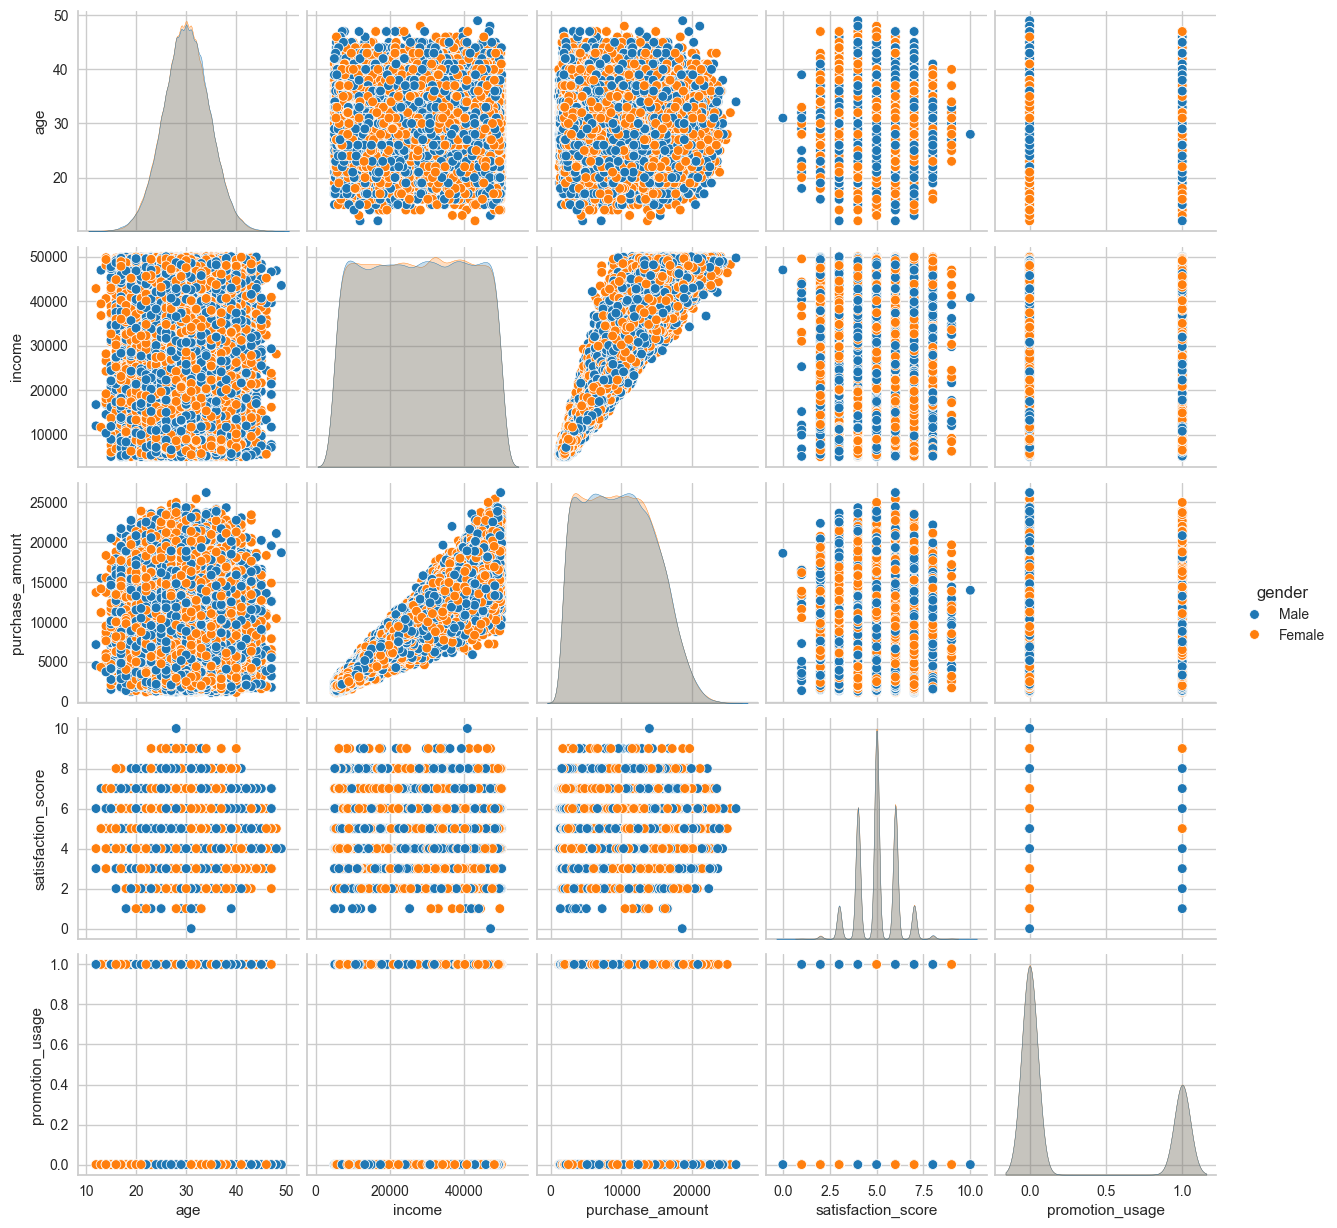

In [15]:
# Vizualization of the data


sns.color_palette("tab10")
To_Plot=["age","gender","income","purchase_amount","satisfaction_score","promotion_usage"]
print("Relative plot of selected features: a data subset")
plt.figure()
sns.pairplot(data[To_Plot], hue="gender", palette=("tab10"))

plt.show()

In [8]:
# Data preprocessing

# List of categorical data
s=(data.dtypes =='object')
object_cols=list(s[s].index)

print("Categorial variables in the dataset:",object_cols)

Categorial variables in the dataset: ['gender', 'education', 'region', 'loyalty_status', 'purchase_frequency', 'product_category']


In [9]:
# Label encoding the object dtypes

LE=LabelEncoder()
for i in object_cols:
    data[i]=data[[i]].apply(LE.fit_transform)

print("All features are now numerical")

All features are now numerical


In [18]:
data.head()

,id,age,gender,income,education,region,loyalty_status,purchase_frequency,purchase_amount,product_category,promotion_usage,satisfaction_score
0,1,27,1,40682,0,0,0,0,18249,1,0,6
1,2,29,1,15317,3,3,1,2,4557,2,1,6
2,3,37,1,38849,0,3,2,2,11822,2,0,6
3,4,30,1,11568,2,2,1,0,4098,4,0,7
4,5,31,0,46952,1,1,1,1,19685,2,1,5


<Axes: >

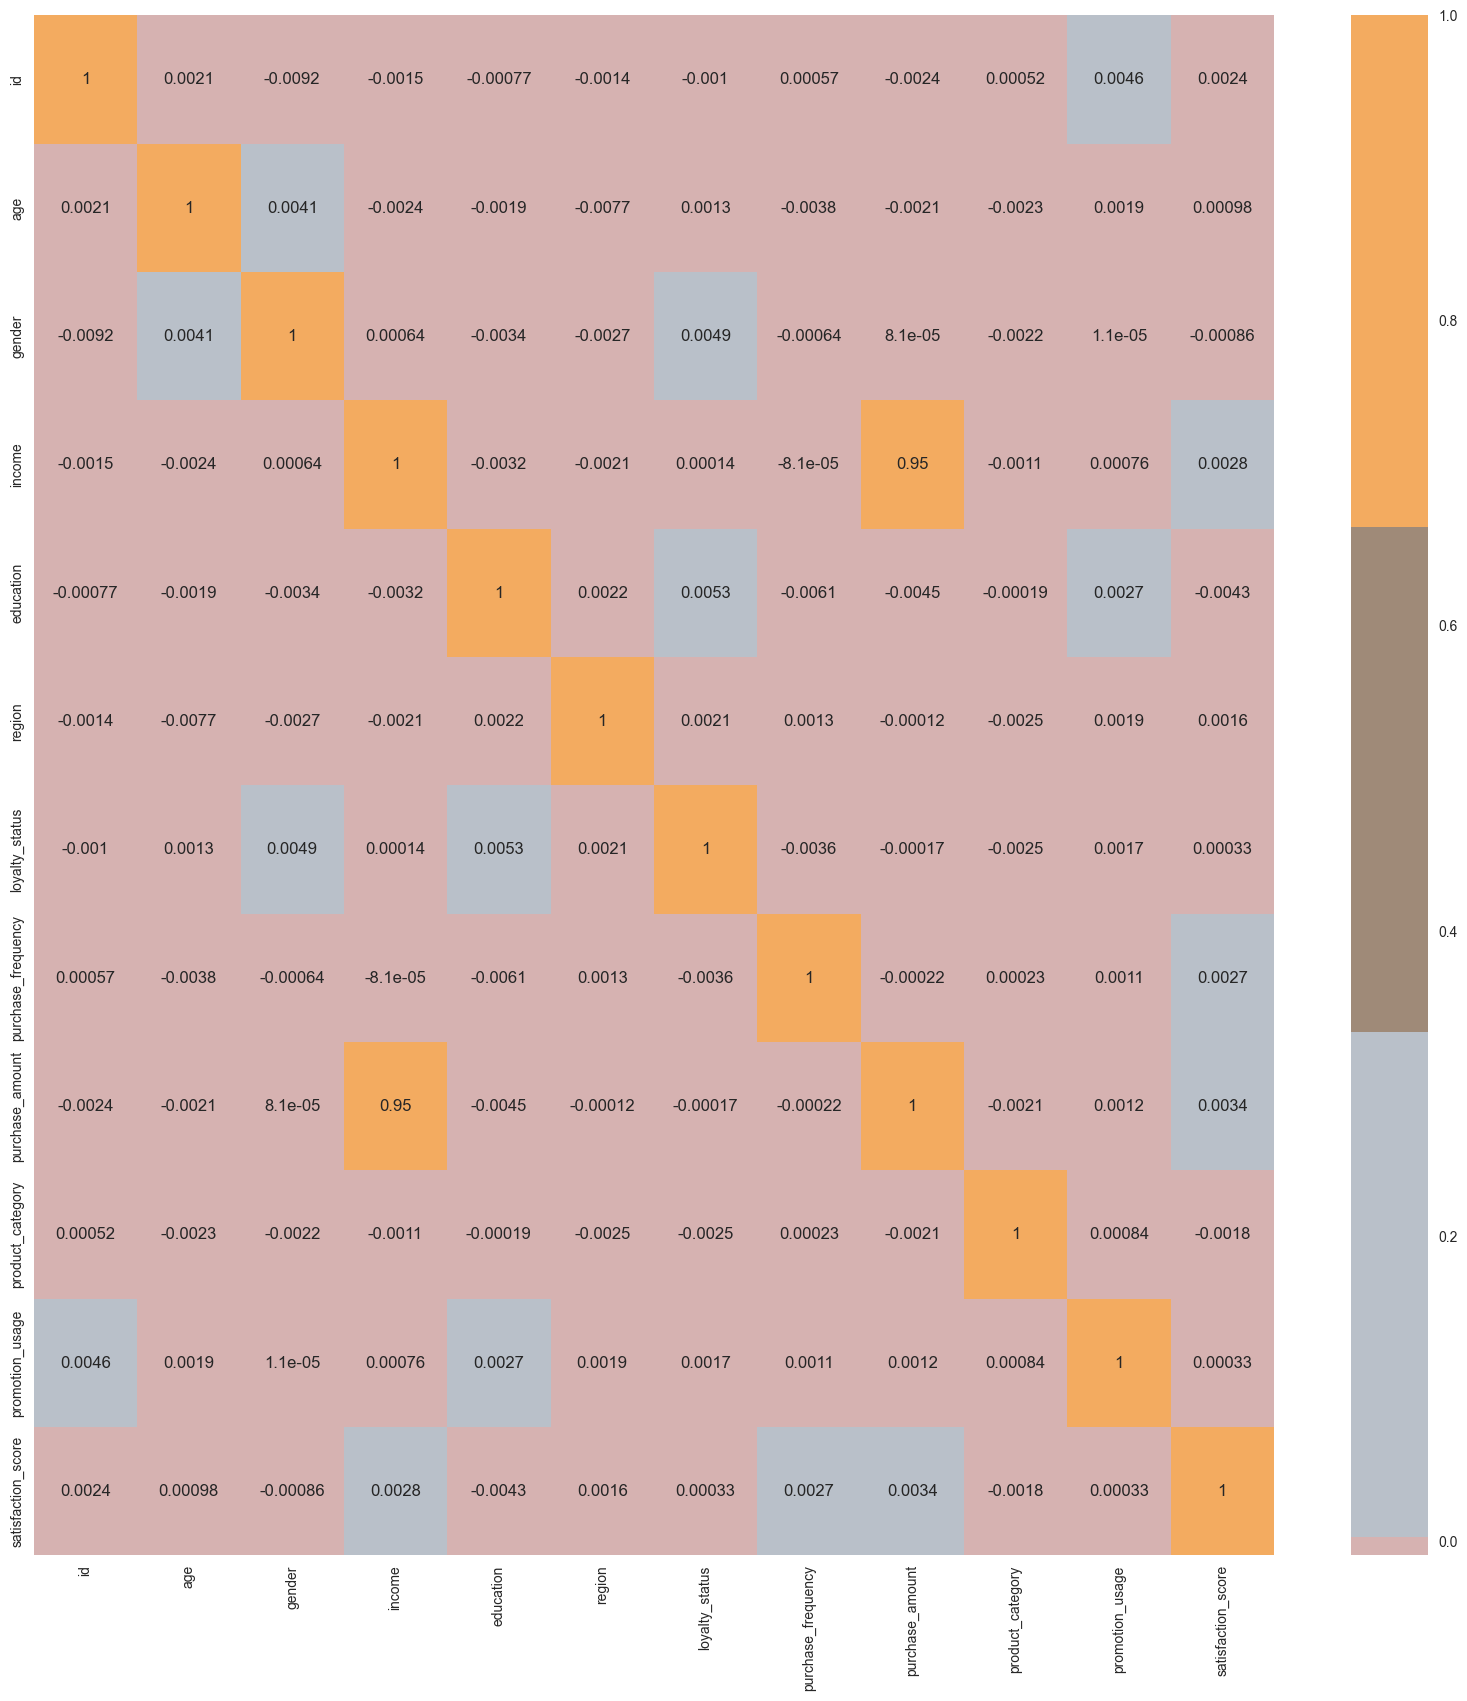

In [19]:
# Correlation matrix
corrmat = data.corr()
plt.figure(figsize=(20,20))
cmap=colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])
sns.heatmap(corrmat,annot=True,cmap=cmap,center=0)

In [10]:
# Creating a copy of data
ds=data.copy()
# Scaling
scaler = StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds),columns=ds.columns)

In [11]:
#Scaled data will beused to reduce the dimensionality
print("Dataframe to be used for modelling:")
scaled_ds.head()

Dataframe to be used for modelling:


,id,age,gender,income,education,region,loyalty_status,purchase_frequency,purchase_amount,product_category,promotion_usage,satisfaction_score
0,-1.732033,-0.670294,1.001481,1.013004,-1.161470,-1.244518,-2.005686,-1.661335,1.794883,-1.238811,-0.655901,0.953443
1,-1.731999,-0.223916,1.001481,-0.938642,2.024015,1.246693,-0.335200,0.896060,-1.058024,-0.570487,1.524621,0.953443
2,-1.731964,1.561594,1.001481,0.871969,-1.161470,1.246693,1.335287,0.896060,0.455734,-0.570487,-0.655901,0.953443
3,-1.731930,-0.000728,1.001481,-1.227100,0.962186,0.416290,-0.335200,-1.661335,-1.153663,0.766159,-0.655901,1.916176
4,-1.731895,0.222461,-0.998521,1.495434,-0.099642,-0.414114,-0.335200,-0.382638,2.094092,-0.570487,1.524621,-0.009290


In [12]:
# Dimentionality reduction: the process of reducing the number of random variables
# Principal component analysis (PCA) will be used for dimentinality reduction

pca=PCA(n_components=3)
pca.fit(scaled_ds)
PCA_ds=pd.DataFrame(pca.transform(scaled_ds),columns=["col1","col2","col3"])
PCA_ds.describe().T


,count,mean,std,min,25%,50%,75%,max
col1,100000.0,5.783818e-17,1.395901,-2.463020,-1.199023,-0.008264,1.167171,3.654406
col2,100000.0,-7.503331e-17,1.007004,-3.810084,-0.702466,-0.003001,0.700762,4.036062
col3,100000.0,-5.087486e-17,1.005822,-3.512953,-0.703707,-0.028601,0.679624,4.106773


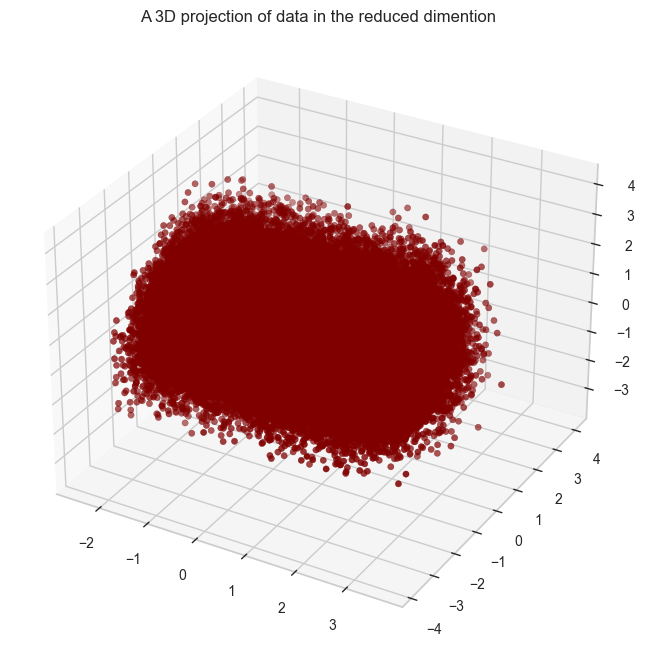

In [13]:
# A 3D projection of datain the reduced dimention
x=PCA_ds["col1"]
y=PCA_ds["col2"]
z=PCA_ds["col3"]

# Plotting 
fig=plt.figure(figsize=(10,8))
ax=fig.add_subplot(111,projection="3d")
ax.scatter(x,y,z,c="maroon",marker="o")
ax.set_title("A 3D projection of data in the reduced dimention")
plt.show()

Elbow methos to determine the number of clusters to be formed:


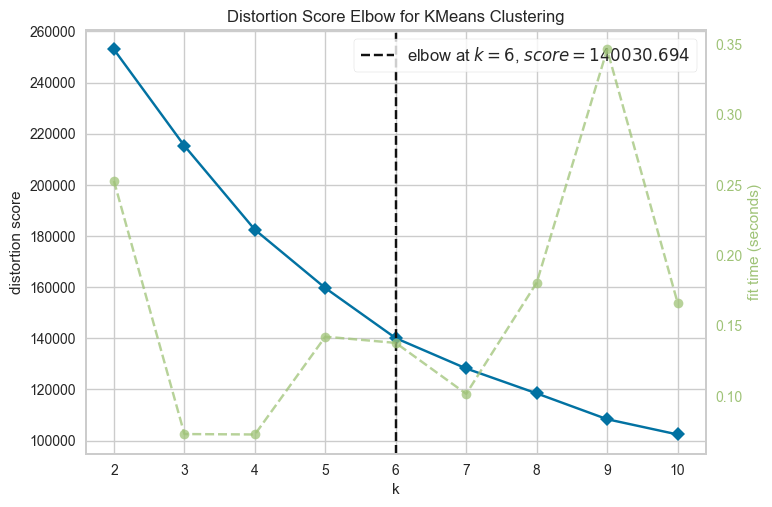

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [14]:
# Clustering - agglomerative clustering (hierarchical)
# Elbow methos used to determine the number of clusters to be formed

print("Elbow methos to determine the number of clusters to be formed:")
Elbow_M=KElbowVisualizer(KMeans(),k=10) 
Elbow_M.fit(PCA_ds)
Elbow_M.show()

In [15]:
# Agglomerative Clustering model

AC=AgglomerativeClustering(n_clusters=6)
#Fitting the model and predict clusters
yhat_AC=AC.fit_predict(PCA_ds)
PCA_ds["clusters"]=yhat_AC
# Adding the clusters feature to the original dataframe

data["clusters"]=yhat_AC

In [ ]:
# Visualizing clusters
fig=plt.figure(figsize=(10,8))
ax=plt.subplot(111,projection='3d',label='bla')
ax.scatter(x,y,z,s=40,c=PCA_ds["clusters"],marker='o',cmap=cmap)
ax.set_title("The plot of clusters")
plt.show()


In [ ]:
# Visualizing countplot of clusters

pl=sns.countpot(x=data['clusters'],palette='tab10')
pl.set_title("Distribution of clusters")
plt.show()

In [ ]:
pl=sns.scatterplot(data=data,x=data["Spent"],y=data["income"],hue=data["clusters"],palette="tab10")
pl.set_title("Cluster's profile based on income and spending")
plt.legend()
plt.show()